In [1]:

import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np




In [ ]:
##!pip install pytorch


## CNNs for CIFAR10

* https://rcalix1.github.io/DeepLearningAlgorithms/SecondEdition/chapter6_CNNs/index.html

## Load and save torch model checkpoints

* https://pytorch.org/tutorials/beginner/saving_loading_models.html

## Data

* Data: https://github.com/YoongiKim/CIFAR-10-images/tree/master


In [2]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [4]:

## !pip install torchvision


In [5]:

torch.cuda.is_available()


True

In [6]:

torch.cuda.device_count()


1

In [7]:

torch.cuda.current_device()


0

In [8]:

torch.cuda.get_device_name(0)


'NVIDIA A30'


## Assign device


In [9]:

torch_device = torch.device("cpu")

if torch.cuda.is_available(): 
    torch_device = torch.device("cuda")


In [10]:

torch_device


device(type='cuda')


## CIFAR10 DATA


In [11]:

raw_data_train = '/home/huizarn/Desktop/CIFAR-10-images-master/train/'

raw_data_test  = '/home/huizarn/Desktop/CIFAR-10-images-master/test/'



## PATH to checkpoint


In [12]:

PATH = "/scratch/scholar/huizarn/CNN_model_CIFAR10"



## Train data


In [13]:

dataset_train = []
labels_train  = []
targets_train = []


In [14]:

for folder in sorted(os.listdir(raw_data_train)):
    for image in sorted(os.listdir(os.path.join(raw_data_train, folder))):
        if folder not in labels_train:
            labels_train.append(folder)
        targets_train.append(labels_train.index(folder))
        
        img_arr = imageio.imread( os.path.join(raw_data_train, folder, image), pilmode="RGB")
        ## resize = torchvision.transforms.Resize(size)
        ## crop_center = torchvision.transforms.CenterCrop(size)

        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        ## img = resize(img)
        ## img = crop_center(img)
        img /= 255
        dataset_train.append(img)
        
      


In [15]:

len(labels_train)


10

In [16]:

len( targets_train )


50000

In [17]:

dataset_train[3].shape


torch.Size([3, 32, 32])

In [18]:

data_train    = torch.stack( dataset_train )
targets_train = torch.Tensor(  targets_train  ).type(   torch.LongTensor   )

torch.save(   (data_train, targets_train, labels_train), "InClass_CIFAR10_data"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [19]:

data_train.shape


torch.Size([50000, 3, 32, 32])

In [20]:

targets_train.shape


torch.Size([50000])

In [21]:

data_train[4].shape


torch.Size([3, 32, 32])

In [22]:

targets_train[24000:25000]


tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,


## Print images


In [23]:

img_tr = data_train[46000]
img_tr


tensor([[[0.8392, 0.8353, 0.7059,  ..., 0.2471, 0.2902, 0.2627],
         [0.8196, 0.8353, 0.7765,  ..., 0.1961, 0.2510, 0.2353],
         [0.8039, 0.7961, 0.7922,  ..., 0.1961, 0.2392, 0.2431],
         ...,
         [0.2078, 0.1647, 0.1255,  ..., 0.4275, 0.4196, 0.4314],
         [0.2392, 0.2471, 0.2235,  ..., 0.4235, 0.4392, 0.4510],
         [0.2314, 0.2510, 0.2275,  ..., 0.4078, 0.4275, 0.4588]],

        [[0.7569, 0.7490, 0.6196,  ..., 0.2588, 0.2980, 0.2667],
         [0.7333, 0.7490, 0.6824,  ..., 0.2078, 0.2588, 0.2471],
         [0.7098, 0.7020, 0.6863,  ..., 0.2157, 0.2667, 0.2706],
         ...,
         [0.2118, 0.1647, 0.1255,  ..., 0.4000, 0.4039, 0.4196],
         [0.2353, 0.2431, 0.2157,  ..., 0.3961, 0.4157, 0.4392],
         [0.2235, 0.2392, 0.2157,  ..., 0.3725, 0.4039, 0.4353]],

        [[0.5490, 0.5529, 0.4353,  ..., 0.1922, 0.2549, 0.2353],
         [0.5373, 0.5569, 0.5020,  ..., 0.1412, 0.2078, 0.2039],
         [0.5216, 0.5216, 0.5176,  ..., 0.1373, 0.1961, 0.

In [24]:

transform = T.ToPILImage()



In [25]:

img = transform(  img_tr  )


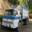

In [26]:

img



## Class balance


In [27]:

y_train_np = targets_train.numpy() 
y_train_np.shape

the_set = np.unique(  y_train_np  )
the_set


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

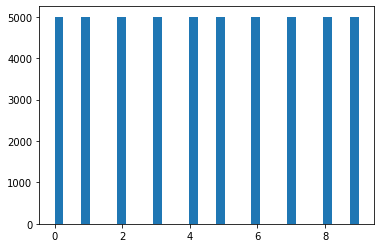

In [28]:

_ = plt.hist( targets_train.numpy() , bins="auto" )
plt.show()



## Test Data


In [29]:

dataset_test = []
labels_test = []
targets_test = []


In [30]:

for folder in sorted(os.listdir(raw_data_test)):
    for image in sorted(os.listdir(os.path.join(raw_data_test, folder))):
        if folder not in labels_test:
            labels_test.append(folder)
        targets_test.append(labels_test.index(folder))
        
        # Read the image in RGB mode
        img_arr = imageio.imread(os.path.join(raw_data_test, folder, image), pilmode="RGB")
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_test.append(img)


In [31]:

data_test   = torch.stack( dataset_test )
targets_test = torch.Tensor(  targets_test  ).type(   torch.LongTensor   )

torch.save(   (data_test, targets_test, labels_test), "InClass_CIFAR10_data_test"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [32]:

data_test.shape


torch.Size([10000, 3, 32, 32])

In [33]:

targets_test.shape


torch.Size([10000])

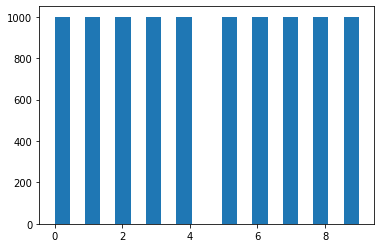

In [34]:

_ = plt.hist( targets_test.numpy() , bins="auto" )
plt.show()


In [35]:

X_train = data_train  
y_train = targets_train


In [36]:

X_test = data_test  
y_test = targets_test 



## Change to float 32


In [37]:

X_train = X_train.numpy()
X_test  = X_test.numpy()


In [38]:

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )


In [39]:

X_train = torch.from_numpy(X_train )
X_test = torch.from_numpy( X_test  )



## Print shapes


In [40]:

X_train.shape[0]


50000

In [41]:

y_train[30000].item()
type(y_train[30000].item())


int

In [42]:

y_train[30000].item()


6

In [43]:

 X_train[78]


tensor([[[0.4706, 0.4784, 0.4824,  ..., 0.4863, 0.4863, 0.4863],
         [0.4941, 0.4941, 0.4980,  ..., 0.4784, 0.4784, 0.4784],
         [0.5255, 0.5255, 0.5255,  ..., 0.4824, 0.4824, 0.4824],
         ...,
         [0.8078, 0.8078, 0.8000,  ..., 0.5216, 0.4431, 0.3686],
         [0.6941, 0.6627, 0.6431,  ..., 0.5843, 0.5176, 0.3804],
         [0.5765, 0.5451, 0.5529,  ..., 0.4196, 0.4314, 0.4824]],

        [[0.8196, 0.8157, 0.8157,  ..., 0.7961, 0.7961, 0.7961],
         [0.8275, 0.8275, 0.8235,  ..., 0.7882, 0.7882, 0.7882],
         [0.8471, 0.8471, 0.8392,  ..., 0.7922, 0.7922, 0.7922],
         ...,
         [0.8392, 0.8471, 0.8471,  ..., 0.6118, 0.5333, 0.4588],
         [0.7451, 0.7137, 0.7020,  ..., 0.6392, 0.5725, 0.4353],
         [0.6431, 0.6118, 0.6196,  ..., 0.4392, 0.4510, 0.5020]],

        [[0.9451, 0.9451, 0.9373,  ..., 0.9176, 0.9176, 0.9176],
         [0.9412, 0.9412, 0.9412,  ..., 0.9098, 0.9098, 0.9098],
         [0.9412, 0.9412, 0.9373,  ..., 0.9137, 0.9137, 0.

In [44]:

 CIFAR_train_list = [  ( X_train[i],  y_train[i].item() )  for i in range( X_train.shape[0]   )  ]


In [45]:

 CIFAR_test_list = [  ( X_test[i],  y_test[i].item() )  for i in range( X_test.shape[0]   )  ]



## DataLoader


In [238]:

batch_size = 256


In [239]:

train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size=batch_size, shuffle=True  )


In [240]:

test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size=10000, shuffle=True  )



## Architectures


In [241]:

32*32*3


3072

In [242]:

class DL_3h_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 , 200)
        self.act1    = nn.ReLU()
        
        self.linear2 = nn.Linear(200 , 100)
        self.act2   = nn.ReLU()
        
        self.linear3 = nn.Linear( 100 ,50)
        self.act3    = nn.ReLU()
        
        self.linear4 = nn.Linear(50 , 10)
        self.act4    = nn.Softmax(dim=1)
        
        ## self.norm    = nn.LayerNorm()
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.linear2(x)
        x            = self.act2(x)
        x            = self.linear3(x)
        x            = self.act3(x)
      
        x            = self.linear4(x)
        y_pred       = self.act4(x)
        
        return y_pred


In [243]:

class CNN_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.Dropout(0.2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(128),
            
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.Dropout(0.2),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.Dropout(0.2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ELU(),
            nn.BatchNorm2d(256),
            
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.GELU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.Dropout(0.2),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.Dropout(0.2),

            nn.Flatten(), 
            nn.Linear(256, 256),
            nn.PReLU(),
            nn.Linear(256, 12),
            nn.LeakyReLU(),
            nn.Linear(12, 10),
            nn.LogSoftmax(dim=1)
        )
        
    ## perform inference
    def forward(self, x):
        
        y_pred       = self.model( x )
        
        return y_pred



In [244]:


class CNNN_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.conv7 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(128)
        self.conv8 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn8 = nn.BatchNorm2d(256)
        self.conv9 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn9 = nn.BatchNorm2d(256)
        self.conv10 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn10 = nn.BatchNorm2d(256)

        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 20)
        self.fc3 = nn.Linear(20, 10)

    ## perform inference
    def forward(self, x):
        out = F.leaky_relu(self.bn1(self.conv1(x)))
        out = F.leaky_relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, 2, 2) # output: 32 x 16 x 16
        out = F.dropout(out, 0.35)

        out = F.leaky_relu(self.bn3(self.conv3(out)))
        out = F.leaky_relu(self.bn4(self.conv4(out)))
        out = F.max_pool2d(out, 2, 2) # output: 64 x 8 x 8
        out = F.dropout(out, 0.35)

        out = F.leaky_relu(self.bn5(self.conv5(out)))
        out = F.elu(self.bn6(self.conv6(out)))
        out = F.max_pool2d(out, 2, 2) # output: 128 x 4 x 4
        out = F.dropout(out, 0.35)

        out = F.leaky_relu(self.bn7(self.conv7(out)))
        out = F.leaky_relu(self.bn8(self.conv8(out)))
        out = F.max_pool2d(out, 2, 2) # output: 256 x 2 x 2
        out = F.dropout(out, 0.35)

        out = F.elu(self.bn9(self.conv9(out)))
        out = F.leaky_relu(self.bn10(self.conv10(out)))
        out = F.max_pool2d(out, 2, 2) # output: 256 x 1 x 1
        out = F.dropout(out, 0.35)

        out = out.view(out.size(0), -1) # flatten
        out = F.elu(self.fc1(out))
        out = F.leaky_relu(self.fc2(out))
        out = F.log_softmax(self.fc3(out), dim=1)
        y_pred = out
        return y_pred

In [245]:

class MLP_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 ,20)
        self.act1    = nn.LeakyReLU()
        self.linear2 = nn.Linear(20 , 10)
        self.act2    = nn.Softmax(dim=1)
        
        self.norm    = nn.LayerNorm()
        self.dropout = nn.Dropout(0.2)
        
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.norm(x)
        x            = self.dropout(x)
        
        x            = self.linear2(x)
        y_pred       = self.act2(x)
        
        return y_pred


In [246]:

def training_loop( N_Epochs, model, loss_fn, opt ):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            ## xb = xb.view(  (16, -1 ) )
            
            xb = xb.to( torch_device )
            yb = yb.to( torch_device )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)
            new_PATH = PATH + str(epoch)
            print( new_PATH )
            torch.save(model, new_PATH)


In [247]:

## torch.save(model, PATH)





## Core functions


In [248]:

N_Epochs      = 100
learning_rate = 0.003

In [249]:

## model = MLP_net()
## model =  DL_3h_net()

model = CNNN_net()

model.to( torch_device )

opt = torch.optim.Adam(  model.parameters(), lr=learning_rate  )

loss_fn = nn.CrossEntropyLoss()


In [250]:



training_loop( N_Epochs, model, loss_fn, opt )


0 loss= tensor(1.6404, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/huizarn/CNN_model_CIFAR100
5 loss= tensor(0.6850, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/huizarn/CNN_model_CIFAR105
10 loss= tensor(0.7441, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/huizarn/CNN_model_CIFAR1010
15 loss= tensor(0.5707, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/huizarn/CNN_model_CIFAR1015
20 loss= tensor(0.4392, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/huizarn/CNN_model_CIFAR1020
25 loss= tensor(0.2742, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/huizarn/CNN_model_CIFAR1025
30 loss= tensor(0.6219, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/huizarn/CNN_model_CIFAR1030


KeyboardInterrupt: 

In [251]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))


In [252]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        ## x_real = x_real.view(  (batch_size, -1 ) )
        
        x_real = x_real.to( torch_device )
        
        y_pred = model(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function( y_real, preds.cpu() )
   


Accuracy: 0.80
Confusion Matrix:
[[814  10  36  20  17   1   5   7  63  27]
 [ 11 907   4   3   1   4  11   4   9  46]
 [ 48   0 719  49  61  49  53   9  11   1]
 [ 15   4  62 643  41 137  60  22   7   9]
 [  8   1  67  37 793  25  32  30   6   1]
 [  6   1  45 164  43 677  20  36   7   1]
 [  6   1  38  43  29  14 862   0   4   3]
 [ 11   3  23  41  70  37   4 801   2   8]
 [ 33  20   7  10   8   0   5   1 898  18]
 [ 23  53   6  13   7   3   7   8  18 862]]
Precision: 0.799
Recall: 0.798
F1-measure: 0.798



## From checkpoint


In [ ]:

# Model class must be defined somewhere
model2 = torch.load('/scratch/scholar/huizarn/CNN_model_CIFAR1010860')
## model.eval()



In [ ]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        ## x_real = x_real.view(  (batch_size, -1 ) )
        
        y_pred = model2(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)


In [ ]:

rc = data_train[4].view((-1))
rc.shape


In [ ]:

rc = torch.unsqueeze(rc, dim=0)
rc.shape


In [ ]:

## example_label = model( rc )


In [ ]:

## example_label



## Figure out the dimensions of CNN


In [ ]:

N_batches_rc = 256


In [ ]:
'''

model_rc = nn.Sequential(
            
            ## conv layer 1
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1  ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            
            ## conv layer 2
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1  ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
              
            ## FeedForward
            
            nn.Flatten()
            
            
        
        )
        
'''


model_rc  = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.Dropout(0.2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(128),
            
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.Dropout(0.2),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.Dropout(0.2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ELU(),
            nn.BatchNorm2d(256),
            
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.GELU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.Dropout(0.2),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.Dropout(0.2),

            nn.Flatten()
)


In [ ]:

my_tensor_test   = torch.randn(N_batches_rc, 3, 32,  32)

res_actual_model = model_rc(  my_tensor_test   )

res_actual_model.shape
